# Project - Housing prices in the city of São Paulo

## **4th Data Imersion - Alura**
**Author:** *Gabriel João Dalla Nora*

## Summary

[01. - Introduction](#01.-Introduction)

[01.1 - The problem](#01.1-The-problem)
<br><br>
[02. - Exploratory data analysis](#02.-Exploratory-data-analysis)

[02.1 - Useful libraries](#02.1-Useful-libraries)

[02.2 - Loading the data](#02.2-Loading-the-data)

[02.3 - Data exploration, treatmeant and cleaning](#02.3-Data-exploration,-treatmeant-and-cleaning)

[02.4 - Visualization of numerical data](#02.4-Visualization-of-numerical-data)

[02.5 - Outlier treatment](#02.5-Outlier-treatment)
<br><br>

[03. - Crossing databases](#03-Crossing-databases)

[03.1 - Useful libraries](#03.1-Useful-libraries)

[03.2 - IBGE income dataset](#03.2-IBGE-income-dataset)

[03.3 - São Paulo adresses dataset](#03.3-São-Paulo-adresses-dataset)

[03.4 Using geopandas for obtaining the Census Sector](#03.4-Using-geopandas-for-obtaining-the-Census-Sector)

<br><br>
[04. - Modelos de ML aplicados aos dados tratados](#04-Modelos-de-ML-aplicados-aos-dados-tratados)

[04.1 - Bibliotecas de ML utilizadas](#04.1-Bibliotecas-de-ML-utilizadas)

[04.2 - Modelo de Regressão Linear](#04.2-Modelo-de-Regressão-Linear)

[04.3 - Modelo de Floresta Aleatória](#04.3-Modelo-de-Floresta-Aleatória)

[04.4 - Extreme gradient boosting](#04.4-Extreme-gradient-boosting)

[04.5 - Conclusões](#04.5-Conclusões)
<br><br>

[Referências](#Referências)

[Sobre mim](#Sobre-mim)

## 01. Introduction

This project is inspired in the 4th Data Imersion organized by the EdTech <a href=https://www.alura.com.br>Alura</a> between 23/05/2022 and 27/05/2022 (D/M/Y). In this period, Alura provided five free lessons for a deeper understanding of Data Science. The lessons were about:

<ol>
    <li>Using Google Colab and Pandas library;</li>
    <li>Data treatment and seaborn library;</li>
    <li>Exploratory data analysis and time series;</li>
    <li>Crossing data bases;</li>
    <li>Machine Learning.</li>
</ol>

For this Data Imersion the focus was on Imobiliary Market.

### 01.1 The problem

Using the São Paulo housing price dataset, that can be found on <a href=https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo>Kaggle</a>, we will create an ML model for the prediction the house price. For this, we will use another dataset that includes <a href=https://drive.google.com/file/d/1u2qPFtYaE4of3Vb3d7yQEVEbS5FdQ_FP/view>adresses in São Paulo</a> and data collected by the Brazillian Statistics Institute (or *IBGE* in portuguese), more specific our interest will be in the average <a href=https://drive.google.com/drive/folders/1CycoanzYN2oxKHPO6zxvIQ6Og1LBcujv>family income</a> of each neighborhood. 

## 02. Exploratory data analysis

### 02.1 Useful libraries

In [1]:
#For working with datasets;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Some configuration options

In [2]:
# Warning suppresions;
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 02.2 Loading the data

At first we read the dataset that contains the housing price in São Paulo.

In [3]:
path = "dados_imoveis.csv"
dados_imoveis_or = pd.read_csv(path)
dados_imoveis_or.sample(10)

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7224,7224,Rua Marcos Fernandes,Jardim da Saúde,São Paulo,96,2,1,2,R$ 950.000
7568,7568,NaN,Bosque da Saúde,São Paulo,650,4,1,12,R$ 2.600.000
2049,2049,NaN,Jardim das Bandeiras,São Paulo,390,4,4,4,R$ 3.000.000
7652,7652,NaN,Vila Monumento,São Paulo,173,3,5,4,R$ 1.100.000
3054,3054,Rua das Begônias,Cidade Jardim,São Paulo,456,5,4,7,R$ 2.200.000
7286,7286,NaN,Vila Gumercindo,São Paulo,250,3,1,2,R$ 1.380.000
6719,6719,Rua Leandro Dupré,Vila Clementino,São Paulo,144,3,2,5,R$ 2.800.000
5067,5067,"Rua Plínio Salgado, 167",Jardim Peri Peri,São Paulo,156,2,2,3,R$ 1.500.000
5633,5633,Rua Jaguanambi,Cidade Jardim,São Paulo,461,4,8,3,R$ 2.590.000
5269,5269,"Rua Dom Henrique, 50",Jardim Luzitânia,São Paulo,765,5,7,6,R$ 29.780.000


Here is an translation of the meaning of each column:

* Rua -> Street
* Bairro -> Neighborhood/District (I will be using neighborhood in this notebook)
* Cidade -> City
* Metragem -> Lot area
* Quartos -> Bedrooms
* Banheiros -> Bathrooms
* Vagas -> Vacancies
* Valor -> Price

### 02.3 Data exploration, treatmeant and cleaning

The first thing that grab our attention is the unnamed column. This column contains the index values of each row, so we will be removing it from our data.

In [4]:
dados_imoveis_or.drop('Unnamed: 0', axis=1, inplace=True)

After that we set our eyes in the "Valor" (price) column. Here we have the "real sign", the data price and an extra that includes monthly payment, for rent. We will, on a first approach, use the extra to exclude renting houses. So, our first work is with the typing of this data.

In [5]:
dados_imoveis_cop = dados_imoveis_or.copy() 
#I don't want to make to much alterations on the original database, so I create a copy.
dados_imoveis_cop["Valor"].str.split(expand=True).loc[[3866,7375,8087,8382,9101]]
#The entries at the "loc" command are just to find some specific data.

,0,1,2
3866,R$,8.000.000,None
7375,R$,960.000,None
8087,R$,1.200.000,None
8382,R$,20.000,/Mês
9101,R$,1.350.000,None


As we can see, the column "Valor" is now splited in three new columns. The first contains the "real sign", the second the price and the last is our extra. Now, I will create three new columns on the dataset that contains those informations.

In [6]:
dados_imoveis_cop[["Moeda","Preço","Extra"]] = dados_imoveis_cop["Valor"].str.split(expand=True)
dados_imoveis_cop

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Extra
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês


First, I need to see if there is any other coin being used.

In [7]:
dados_imoveis_cop["Moeda"].unique()

array(['R$'], dtype=object)

And my answer is no, only Real is being accepted as payment. Now, procceding with the analysis, I will remove the renting houses and then the columns "Valor", "Moeda" and "Extra".

In [8]:
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Extra"].isnull()]
dados_imoveis_cop.drop(columns=["Valor","Moeda","Extra"], axis=1, inplace=True)

With this cleared, let's get some info about the dataset.

In [9]:
dados_imoveis_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6107 non-null   object
 1   Bairro     9146 non-null   object
 2   Cidade     9156 non-null   object
 3   Metragem   9156 non-null   int64 
 4   Quartos    9156 non-null   int64 
 5   Banheiros  9156 non-null   int64 
 6   Vagas      9156 non-null   int64 
 7   Preço      9156 non-null   object
dtypes: int64(4), object(4)
memory usage: 643.8+ KB


Our column "Preço" (or Price in English) is now an object, however because this column contain the house price it's type shoul be "float64".

In [10]:
dados_imoveis_cop["Preço"] = dados_imoveis_cop["Preço"].str.replace(".","", regex=False).astype(float)

With this conversion done, let's see the number of null values present on our data.

In [11]:
dados_imoveis_cop.isnull().sum()

Rua          3049
Bairro         10
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Preço           0
dtype: int64

Here we can see that the streets have lots of null values, and some neighborhoods aren't here too! Because we don't know, yet, what we will be using for our ML model I won't be making any alteration on them.

For now, I will try to remove some duplicated data on the dataset, for this I will first ignore the column "Rua", after that I will ignore the column "Bairro", and then I will include both of them (although this last step can be seen as useless).

In [12]:
dados_imoveis_cop.drop_duplicates(subset=["Bairro","Cidade","Metragem","Quartos","Banheiros","Vagas","Preço"], inplace=True)
dados_imoveis_cop.drop_duplicates(subset=["Rua","Cidade","Metragem","Quartos","Banheiros","Vagas","Preço"], inplace=True)
dados_imoveis_cop.drop_duplicates(subset=["Bairro","Rua","Cidade","Metragem",
                                          "Quartos","Banheiros","Vagas","Preço"], inplace=True)

And now I will remove neighborhoods that only have one house for sell, after all they won't give us any useful result. Of course, for an deeper analysis it's possible that the removal of neighborhoods with more houses should be considered.

In [13]:
#Defino uma função que irá me permitir obter os bairros com apenas uma casa a venda.
def bairros_ruins(DATASET,AGRUPAMENTO="Bairro",CONTAGEM="Metragem",CASAS=1):
    """
    A sintaxe da função é: bairros_ruins(DATASET, AGRUPAMENTO, CONTAGEM, CASAS=1)
    Essa função irá criar um lista para salvar os bairros que tenham um número menor de casas do que 
    é especificado para a função e irá retornar essa lista. 
    O DATASET será responsável por carregar o dataframe que será analisado. 
    O BAIRRO será responsável pelo agrupamento dos bairros.
    A CONTAGEM será o termo utilizado para que a contagem do número de casas seja feita. 
    Por fim, CASAS é o número de "corte" para algo ser salvo na lista.
    """
    lista_retorno = []
    for i in DATASET.groupby([AGRUPAMENTO]).count()[CONTAGEM].index:
        val = DATASET.groupby([AGRUPAMENTO]).count()[CONTAGEM].loc[i]
        if val <=CASAS:
            lista_retorno.append(i)
    return lista_retorno

lista = bairros_ruins(dados_imoveis_cop)

In [14]:
dados_imoveis_cop.set_index("Bairro", inplace=True)
dados_imoveis_cop.drop(lista, axis=0, inplace=True)
dados_imoveis_cop.reset_index(inplace=True)
dados_imoveis_cop

,Bairro,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Preço
0,Planalto Paulista,"Avenida Itacira, 255",São Paulo,1000,4,8,6,7000000.0
1,Jardim dos Estados,"Rua Aurelia Perez Alvarez, 42",São Paulo,496,4,4,4,3700000.0
2,Jardim Morumbi,NaN,São Paulo,310,3,2,4,685000.0
3,Mooca,"Rua Tobias Barreto, 195",São Paulo,100,3,2,2,540000.0
4,Santo Amaro,Rua Graham Bell,São Paulo,440,4,4,6,1980000.0
...,...,...,...,...,...,...,...,...
8338,Planalto Paulista,Avenida Odila,São Paulo,267,3,6,4,1500000.0
8339,Vila Sofia,Rua Tapuçu,São Paulo,95,2,2,2,665000.0
8340,Bosque da Saúde,Rua Guararema,São Paulo,605,8,7,5,2300000.0
8341,Vila da Saúde,Rua Estero Belaco,São Paulo,205,3,3,6,1050000.0


### 02.4 Visualization of numerical data

Using the `describe` method we can see some relevant statístics from the dataset.

In [15]:
dados_imoveis_cop.describe()

,Metragem,Quartos,Banheiros,Vagas,Preço
count,8343.000000,8343.000000,8343.000000,8343.000000,8.343000e+03
mean,443.245835,3.458708,3.822726,4.003716,3.127526e+06
std,8220.140402,1.042810,1.977602,2.629136,4.006329e+06
min,20.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,170.000000,3.000000,2.000000,2.000000,9.075000e+05
50%,280.000000,3.000000,4.000000,4.000000,1.850000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.600000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


From this table, we can see that some values are really low (for example an entire house for R$13000), those values are probably for renting houses whose rent value wasn't explicit.

With this in mind, I will remove house prices lower than R$50000.

In [16]:
dados_imoveis_cop = dados_imoveis_cop.query("Preço > 50000")

Now, using the seaborn library and the boxplot method I will take a look on the outliers in the dataset.

<AxesSubplot:xlabel='Preço'>

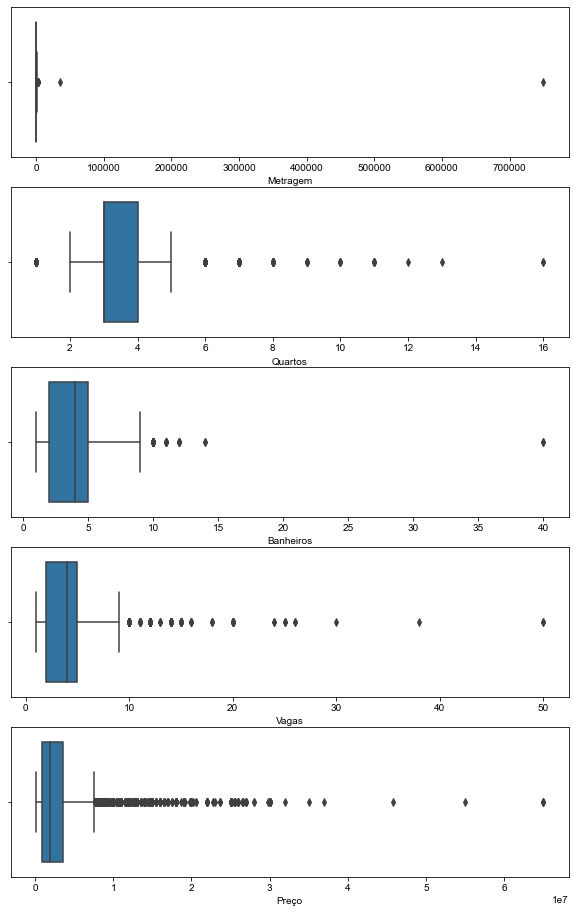

In [17]:
fig, axes = plt.subplots(5,figsize=(10,16))
sns.set_style("whitegrid")
sns.boxplot(data=dados_imoveis_cop, x="Metragem", ax = axes[0])
sns.boxplot(data=dados_imoveis_cop, x="Quartos", ax=axes[1])
sns.boxplot(data=dados_imoveis_cop, x="Banheiros", ax=axes[2])
sns.boxplot(data=dados_imoveis_cop, x="Vagas", ax=axes[3])
sns.boxplot(data=dados_imoveis_cop, x="Preço", ax=axes[4])

### 02.5 Outlier treatment

It's possible to observe the existence of outliers in our dataset, with the one in the "Metragem" (LotArea) plot being the most absurd. For solving those outliers I will use the **Interquartile Distance Range** method. Matematically, this method is giving by:

\begin{equation}
    IQR = Q_3 - Q_1
\end{equation}

He is usefull when we want to detect outlier that goes beyond the present pattern on the dataset. After we calculate the IQR we will do the following operations:

<ol>
    <li>Multiply the IQR by 1.5, this should allow us to discern the outliers from the non-outliers;</li>
    <li>Add (1.5xIQR) to the third quartile, any point beyond its probably an outlier;</li>
    <li>We subtract (1.5xIQR) from the first quartile, any point lower than this should be an outlier;.</li>
</ol>

Although this method allows us to find outliers in most of the times, it is not an foolproof method. In this way we should do an deeper analysis of those values.

In [18]:
#Here I define an function for the IQR
def deq(data):
    """
    Essa função é utilizada para encontrar a distância entre quartis (IQR) dos dados, podendo ser utilizada para encontrar 
    outliers. 
    A sintaxe é deq(data);
    Onde data deve ser a coluna do dataframe onde estamos tentando enontrar outliers.
    No retorno dessa função iremos obter (Primeiro Quartil - 1.5*IQR) e (Terceiro Quartil + 1.5*IQR), respectivamente.
    """
    deq_pquart = data.quantile(0.25)
    deq_tquart = data.quantile(0.75)
    IQR = deq_tquart - deq_pquart
    return deq_pquart-1.5*IQR, deq_tquart+1.5*IQR

#As an first approach, I look for the outliers in the housing values.
pquart_omf, tquart_omf = deq(dados_imoveis_cop["Preço"])
print('Primeiro quartil após operações matemáticas = %s \nTerceiro quartil após operações matemáticas = %s'%
      (pquart_omf, tquart_omf))
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Preço"] > pquart_omf]
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Preço"] < tquart_omf]

Primeiro quartil após operações matemáticas = -3115250.0 
Terceiro quartil após operações matemáticas = 7629150.0


In [19]:
dados_imoveis_cop.describe()

,Metragem,Quartos,Banheiros,Vagas,Preço
count,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03
mean,410.764814,3.388620,3.646174,3.740353,2.184413e+06
std,8585.957018,1.015088,1.886424,2.353772,1.637506e+06
min,20.000000,1.000000,1.000000,1.000000,1.300000e+05
25%,160.000000,3.000000,2.000000,2.000000,8.650000e+05
50%,257.000000,3.000000,3.000000,3.000000,1.690000e+06
75%,400.000000,4.000000,5.000000,5.000000,3.000000e+06
max,750000.000000,16.000000,40.000000,50.000000,7.600000e+06


Now I will remove the outliers for the "Metragem" (LotArea) column. However, after an research on google I found some luxury houses with a LotArea of over 1300m². After looking at those outliers, some of them are farms (or just an absurd area), and I will be removing those specific outliers.

In [20]:
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Metragem"]<3000]
dados_imoveis_cop.describe()

,Metragem,Quartos,Banheiros,Vagas,Preço
count,7643.000000,7643.000000,7643.000000,7643.000000,7.643000e+03
mean,308.075363,3.388460,3.645558,3.740024,2.183735e+06
std,197.171804,1.015044,1.885662,2.353936,1.636788e+06
min,20.000000,1.000000,1.000000,1.000000,1.300000e+05
25%,160.000000,3.000000,2.000000,2.000000,8.650000e+05
50%,257.000000,3.000000,3.000000,3.000000,1.690000e+06
75%,400.000000,4.000000,5.000000,5.000000,3.000000e+06
max,2165.000000,16.000000,40.000000,50.000000,7.600000e+06


In [21]:
#Removing bathroom outliers;
pquart_omf, tquart_omf = deq(dados_imoveis_cop["Banheiros"])
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Banheiros"] > pquart_omf]
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Banheiros"] < tquart_omf]

In [22]:
#Remoing vacancy outliers;
pquart_omf, tquart_omf = deq(dados_imoveis_cop["Vagas"])
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Vagas"] > pquart_omf]
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Vagas"] < tquart_omf]

In [23]:
#Removing bedroom outliers;
pquart_omf, tquart_omf = deq(dados_imoveis_cop["Quartos"])
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Quartos"] > pquart_omf]
dados_imoveis_cop = dados_imoveis_cop[dados_imoveis_cop["Quartos"] < tquart_omf]

In [24]:
dados_imoveis_cop.describe()

,Metragem,Quartos,Banheiros,Vagas,Preço
count,7169.000000,7169.000000,7169.000000,7169.000000,7.169000e+03
mean,295.366857,3.303808,3.557818,3.508300,2.135106e+06
std,177.098165,0.786173,1.693701,1.753574,1.608239e+06
min,20.000000,2.000000,1.000000,1.000000,1.300000e+05
25%,160.000000,3.000000,2.000000,2.000000,8.500000e+05
50%,250.000000,3.000000,3.000000,3.000000,1.600000e+06
75%,392.000000,4.000000,5.000000,4.000000,3.000000e+06
max,1643.000000,5.000000,9.000000,9.000000,7.600000e+06


Now, I will create a new variable that includes the Price/m² of each house in the dataset. For this I use:

\begin{equation}
    \frac{Price}{m^2} = \frac{Preço}{Metragem}
\end{equation}

In [25]:
dados_imoveis_cop["Valor_m2"] = dados_imoveis_cop["Preço"]/dados_imoveis_cop["Metragem"]

In [26]:
dados_imoveis_cop.describe()

,Metragem,Quartos,Banheiros,Vagas,Preço,Valor_m2
count,7169.000000,7169.000000,7169.000000,7169.000000,7.169000e+03,7169.000000
mean,295.366857,3.303808,3.557818,3.508300,2.135106e+06,7233.937976
std,177.098165,0.786173,1.693701,1.753574,1.608239e+06,3769.652573
min,20.000000,2.000000,1.000000,1.000000,1.300000e+05,542.635659
25%,160.000000,3.000000,2.000000,2.000000,8.500000e+05,4722.222222
50%,250.000000,3.000000,3.000000,3.000000,1.600000e+06,6341.463415
75%,392.000000,4.000000,5.000000,4.000000,3.000000e+06,8759.124088
max,1643.000000,5.000000,9.000000,9.000000,7.600000e+06,40000.000000


In [27]:
dados_imoveis_cop[dados_imoveis_cop["Valor_m2"] > 30000]

,Bairro,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Preço,Valor_m2
2377,Jardim Europa,NaN,São Paulo,166,4,5,2,5400000.0,32530.120482
2406,Jardim Europa,NaN,São Paulo,171,4,5,2,5400000.0,31578.947368
3595,Vila Nova Conceição,Rua Damiro de Oliveira Volpe,São Paulo,64,2,2,2,2350000.0,36718.750000
4269,Jardim Ampliação,Rua Marie Nader Calfat,São Paulo,20,3,2,2,800000.0,40000.000000
4311,Jardim Ampliação,Rua Marie Nader Calfat,São Paulo,25,3,2,2,800000.0,32000.000000
5109,Jardim Europa,NaN,São Paulo,198,4,3,5,6300000.0,31818.181818
5669,Jardim Europa,NaN,São Paulo,203,4,3,5,6300000.0,31034.482759


We can see that most of those extreme values are "repeated" (same Neighborhood and Street but a difference of 5m² each). Those values are probably related to some error and will be removed from the dataset.

In [28]:
dados_imoveis_cop.drop([2377,2406,4269,4311,5109,5669], axis=0, inplace=True)

We can see that this new variable allowed us to find some problems with the dataset, with a more careful approach it's probably possible to make an better cleaning in the data.

After all this, we can finally se how our final data distribution will be.

<AxesSubplot:xlabel='Preço'>

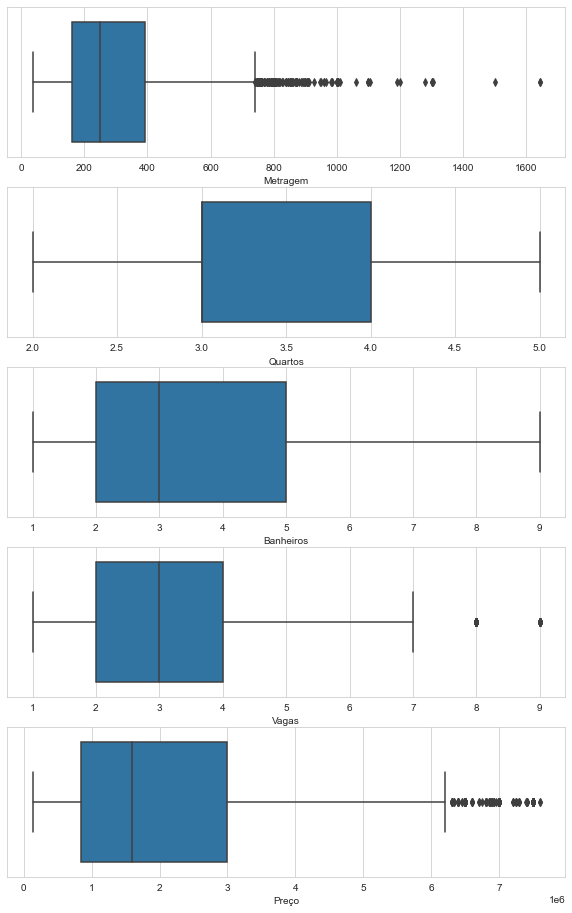

In [29]:
fig, axes = plt.subplots(5,figsize=(10,16))
sns.set_style("whitegrid")
sns.boxplot(data=dados_imoveis_cop, x="Metragem", ax = axes[0])
sns.boxplot(data=dados_imoveis_cop, x="Quartos", ax=axes[1])
sns.boxplot(data=dados_imoveis_cop, x="Banheiros", ax=axes[2])
sns.boxplot(data=dados_imoveis_cop, x="Vagas", ax=axes[3])
sns.boxplot(data=dados_imoveis_cop, x="Preço", ax=axes[4])

Now, we can see how is the Price/m² of the houses in São Paulo.

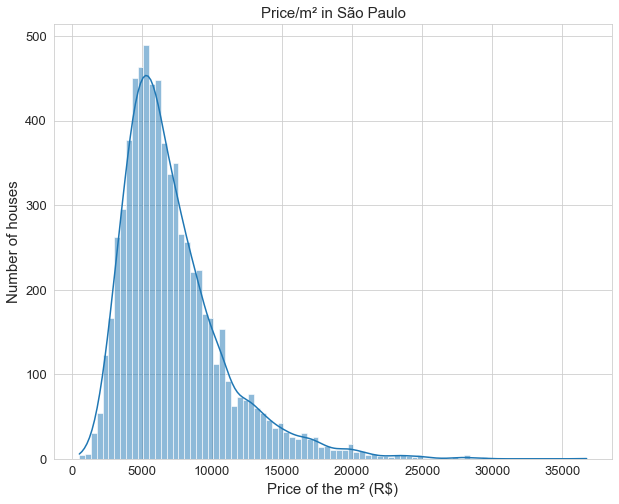

According to the data, the overall Price/m² in São Paulo is R$7219.52


In [30]:
plt.figure(figsize=(10,8))
fonte = {"size":15}
sns.histplot(data=dados_imoveis_cop,x="Valor_m2", kde=True)
plt.xlabel("Price of the m² (R$)", fontdict=fonte)
plt.ylabel("Number of houses", fontdict=fonte)
plt.title("Price/m² in São Paulo", fontdict=fonte)
plt.tick_params(axis="both", labelsize=13)
plt.show()

print("According to the data, the overall Price/m² in São Paulo is R$%s"
      %(round(dados_imoveis_cop["Preço"].sum()/dados_imoveis_cop["Metragem"].sum(),2)))

Now, we make an analysis of the m² for each neighborhood in São Paulo.

In [31]:
bairro_imoveis = dados_imoveis_cop.copy() #I create an copy of the dataset;
bairro_imoveis = bairro_imoveis.groupby(["Bairro"]).sum() #Grouping the data by neighborhood;
bairro_imoveis["Valor_m2"] = bairro_imoveis["Preço"]/bairro_imoveis["Metragem"] #Obtaining the Price/m²;
bairro_imoveis.sort_values(by="Valor_m2", inplace=True, ascending = False) #Data sorting;
bairro_imoveis.reset_index(inplace=True)

<Figure size 1440x1080 with 0 Axes>

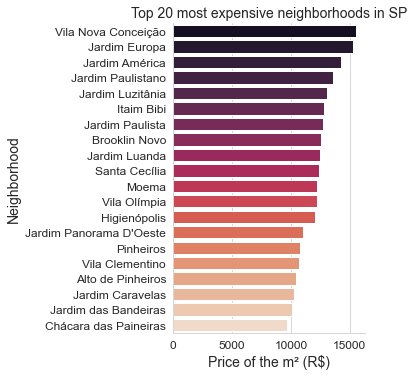

In [34]:
plt.figure(figsize=(20,15))
fonte = {"size":14}
sns.catplot(data=bairro_imoveis.head(20), y="Bairro", x="Valor_m2", kind="bar", palette="rocket")
plt.xlabel("Price of the m² (R$)", fontdict=fonte)
plt.ylabel("Neighborhood", fontdict=fonte)
plt.title("Top 20 most expensive neighborhoods in SP", fontdict=fonte)
plt.tick_params(axis="both", labelsize=12)
plt.show()

<Figure size 1440x1080 with 0 Axes>

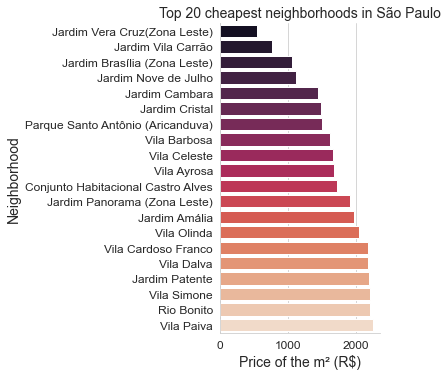

In [35]:
plt.figure(figsize=(20,15))
fonte = {"size":14}
sns.catplot(data=bairro_imoveis.sort_values(by="Valor_m2", ascending = True).head(20), 
            y="Bairro", x="Valor_m2", kind="bar", palette="rocket")
plt.xlabel("Price of the m² (R$)", fontdict=fonte)
plt.ylabel("Neighborhood", fontdict=fonte)
plt.title("Top 20 cheapest neighborhoods in São Paulo", fontdict=fonte)
plt.tick_params(axis="both", labelsize=12)
plt.show()

## 03 Crossing databases

In this section I will try to merge the income dataset from IBGE and the housing dataset that we worked until now.

### 03.1 Useful libraries

In [34]:
#Trabalhar com dados de georefereciamento
import geopandas as gpd

#Essas duas bibliotecas, em conjunto com a geopandas irão permitir a junção de diferentes bancos de dados
from shapely.geometry import Point   
from shapely.geometry import Polygon

### 03.2 IBGE income dataset

In [35]:
#Loading the data
path_ibge_sp = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
dados_IBGE_or = pd.read_csv(path_ibge_sp, sep=";", decimal=",", thousands=".", encoding="ISO-8859-1")
dados_IBGE_or.head(5)

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


The meaning of each column can be found in the [IBGE data dictionary](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view), page 45.

- Cod_setor : Census sector code;
- Cod_Grandes Regiões : Geographic region code;
- Nome_Grande Região : Geographic region name;
- Cod_UF : Federative unit code;
- Nome_da_UF : Federative unit name;
- Cod_meso : Mesoregion code;
- Nome_da_meso : Mesoregion name;
- Cod_micro : Microregion code;
- Nome_da_micro : Microregion name;
- Cod_RM : Metropolitan area code;
- Nome_da_RM : Metropolitan area name;
- Cod_municipio : City code;
- Nome_municipio : City name;
- Cod_distrito : District code;
- Nome_do_distrito : District name; 
- Cod_subdistrito : Subdistrict code;
- Nome_do_subdistrito : Subdistrict name;
- Cod_bairro : Neighborhood code;
- Nome_do_bairro : Neighborhood name;
- Situação_setor : Sector situation code;
<br/><br/>
    - Urban situation – codes: 1, 2 and 3
        - 1- City urban area;
        - 2- City non-urban area;
        - 3- Isolated urban area;
    - Situação rural – códigos: 4, 5, 6, 7 e 8
        - 4- City extension rural settlement;
        - 5- Isolated rural settlement - village;
        - 6- Isolated rural settlement - core;
        - 7- Isolated rural settlement - others;
        - 8- Rural zone
        <br/><br/>
- V001 : Permanent private domiciles or persons responsible for permanent private domiciles
- V002 : Residents in permanent private households or population residing in permanent private households
- V003 : Average number of residents in permanent private households
- V004: Variance in the number of residents in permanent private households
- V005: Value of the average monthly nominal income of persons responsible for permanent private households (with and without income)
- V006 : Variance of nominal monthly income of persons responsible for permanent private households (with and without income
- V007: Value of the average monthly nominal income of persons responsible for permanent private households (with income)
- V008 : Variance of nominal monthly income of persons responsible for permanent private households (with income)
- V009: Value of the average monthly nominal income of people aged 10 years and over (with and without income)
- V010 : Variance of nominal monthly income of people aged 10 years and over (with and without income)
- V011: Value of the average monthly nominal income of people aged 10 years and over (with income)
- V012: Variance of nominal monthly income of people aged 10 years and over (with income)

As a first step, we will rename some itens in the database an drop some columns.

In [36]:
dados_IBGE_or.replace('ï¿½','ã', regex=True, inplace=True)
dicionario_distrito_IBGE = {
    "ãGUA RASA":"ÁGUA RASA", "BELãM":"BELÉM", "BRãS":"BRÁS", "BRASILãNDIA":"BRASILÁNDIA",
    "BUTANTã":"BUTANTÃ","CAPãO REDONDO":"CAPÃO REDONDO","CARRãO":"CARRÃO","CONSOLAããO":"CONSOLAÇÃO",
    "FREGUESIA DO ã":"FREGUESIA DO Ó","GRAJAã":"GRAJAU","JAãANã":"JAÇANÃ","JAGUARã":"JAGUARÉ",
    "JARAGUã":"JARAGUÁ", "JARDIM ãNGELA":"JARDIM ÂNGELA","JARDIM SãO LUãS":"JARDIM SÃO LUÍS",
    "JOSã BONIFãCIO":"JOSÉ BONIFÁCIO", "LIMãO":"LIMÃO", "REPãBLICA":"REPÚBLICA", "SACOMã":"SACOMÃ",
    "SANTA CECãLIA":"SANTA CECÍLIA", "SãO LUCAS":"SÃO LUCAS", "SãO MATEUS":"SÃO MATEUS", 
    "SãO MIGUEL":"SÃO MIGUEL", "SãO RAFAEL":"SÃO RAFAEL", "SAãDE":"SAÚDE", "Sã":"SÉ","TATUAPã":"TATUAPÉ",
    "TREMEMBã":"TREMEMBÉ", "VILA CURUãã":"VILA CURUÇÁ", "VILA JACUã":"VILA JACUÍ", "VILA SãNIA":"VILA SÔNIA",
    "SãO DOMINGOS":"SÃO DOMINGOS"
}
dados_IBGE_or["Nome_do_distrito"].replace(dicionario_distrito_IBGE, inplace = True)
dados_IBGE_or.drop(["Cod_UF","Nome_Grande_Regiao","Cod_Grandes Regiï¿½es","Cod_meso"
                ,"Nome_da_meso","Cod_micro","Nome_da_micro","Nome_da_RM","Cod_RM"
                ,"Cod_municipio","Cod_bairro","Nome_do_bairro","Nome_do_subdistrito"
                ,"Nome_do_municipio","Unnamed: 33"], axis=1, inplace=True)

In [37]:
dados_IBGE_or.head(5)

,Cod_setor,Nome_da_UF,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,São Paulo,355030801,ÁGUA RASA,35503080100,1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,São Paulo,355030801,ÁGUA RASA,35503080100,1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,São Paulo,355030801,ÁGUA RASA,35503080100,1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,São Paulo,355030801,ÁGUA RASA,35503080100,1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,São Paulo,355030801,ÁGUA RASA,35503080100,1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


Our objective is merge `dados_IBGE_or` and `dados_imoves_cops` in a single database. For this, both should have something in common that allows this merging process. We can use the street name or the neighborhood, however in both cases we have the following problem: the street/neighborhood name in both datasets isn't the same. For solving this problem we will load an third database, the São Paulo adresses dataset, that contains the latitude and the longitude for each data on the dataset. With this we should be able to locate the address of each house and finally be able to merge the datasets using the census sector code.

### 03.3 São Paulo adresses dataset 

In [38]:
path_enderecos = "enderecos.csv"
dados_enderecos_sp = pd.read_csv(path_enderecos, engine="python")
dados_enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.0,-30.882674,-55.548830
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.0,-30.855721,-55.555757
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.0,-30.863149,-55.552083
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.0,-30.864415,-55.545860


In [39]:
dados_enderecos_sp = dados_enderecos_sp[dados_enderecos_sp["sigla_uf"]=="SP"] #Pego apenas o estado de São Paulo
dados_enderecos_sp = dados_enderecos_sp[dados_enderecos_sp["nome_localidade"]=="São Paulo"] #Pego apenas a cidade de São Paulo

In [40]:
dados_enderecos_sp.head(5)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
543013,Rua,George Dantu,Rua George Dantu,NaN,Chácara Maria Trindade,São Paulo,SP,5275051.0,-23.422697,-46.812013
543014,Rua,Maria Augusta Fiske,Rua Maria Augusta Fiske,NaN,Chácara Maria Trindade,São Paulo,SP,5275055.0,-23.424251,-46.812687
543015,Rua,Doutor Nilo Cairo,Rua Doutor Nilo Cairo,NaN,Chácara Maria Trindade,São Paulo,SP,5275060.0,-23.411648,-46.815519
543016,Rua,Leonel Martiniano,Rua Leonel Martiniano,NaN,Chácara Maria Trindade,São Paulo,SP,5275065.0,-23.422471,-46.823359
543017,Rua,André Polak,Rua André Polak,NaN,Chácara Maria Trindade,São Paulo,SP,5275070.0,-23.422164,-46.807962


Now, using a RegEx we create a new column with only the streets of São Paulo.

In [41]:
#Base de dados de endereços.
dados_enderecos_sp["rua"] = dados_enderecos_sp["tipo_logr"] + " " + dados_enderecos_sp["logr_nome"]
dados_enderecos_sp["rua"] = dados_enderecos_sp["rua"].str.lower().str.strip()

#Base de dados de vendas de imóveis.
dados_imoveis_cop["Apenas_ruas"] = dados_imoveis_cop["Rua"].str.extract(r'(^[\w ]+)')
dados_imoveis_cop["Apenas_ruas"] = dados_imoveis_cop["Apenas_ruas"].str.lower().str.strip()

In [42]:
dados_imoveis_cop["Apenas_ruas"].head(10)

0                avenida itacira
1      rua aurelia perez alvarez
2                            NaN
3             rua tobias barreto
4                rua graham bell
5            rua francisco paulo
6                     rua tapaji
7       rua vigário joão álvares
9                       rua tuim
10    rua antônio pereira mendes
Name: Apenas_ruas, dtype: object

And finally, we merge both those datasets.

In [43]:
dados_vendas_geo = pd.merge(left=dados_imoveis_cop, right=dados_enderecos_sp[["rua","cep","latitude","longitude"]]
                        ,how="left",left_on="Apenas_ruas"
                        ,right_on="rua").drop_duplicates(subset=dados_imoveis_cop.columns).query("cep > 0")
dados_vendas_geo.reset_index(inplace=True)
dados_vendas_geo.drop("index", inplace=True, axis=1)
dados_vendas_geo.head(5)

,Bairro,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Preço,Valor_m2,Apenas_ruas,rua,cep,latitude,longitude
0,Planalto Paulista,"Avenida Itacira, 255",São Paulo,1000,4,8,6,7000000.0,7000.000000,avenida itacira,avenida itacira,4061000.0,-23.615793,-46.648162
1,Jardim dos Estados,"Rua Aurelia Perez Alvarez, 42",São Paulo,496,4,4,4,3700000.0,7459.677419,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
2,Mooca,"Rua Tobias Barreto, 195",São Paulo,100,3,2,2,540000.0,5400.000000,rua tobias barreto,rua tobias barreto,3176000.0,-23.549960,-46.588173
3,Santo Amaro,Rua Graham Bell,São Paulo,440,4,4,6,1980000.0,4500.000000,rua graham bell,rua graham bell,4737030.0,-23.593796,-46.760077
4,Cidade Mãe do Céu,"Rua Francisco Paulo, 31",São Paulo,145,4,4,2,850000.0,5862.068966,rua francisco paulo,rua francisco paulo,3306050.0,-23.522254,-46.516452


Now that I don't need the "original" datasets, I will remove them and create some space in the memory.

In [44]:
del [dados_imoveis_or, dados_imoveis_cop, dados_enderecos_sp]

Now, using the shapely library I can write the geometric point (longitude, latitude) for each house.

In [45]:
dados_vendas_geo["Ponto"] = ""
for i in dados_vendas_geo.index:
    dados_vendas_geo["Ponto"][i] = Point(dados_vendas_geo["longitude"][i],dados_vendas_geo["latitude"][i])

### 03.4 Using geopandas for obtaining the Census Sector

Now, using a new database, we can find the census sector of each house in `dados_vendas_geo`.

In [46]:
#Carrego a base de dados
path_shp = '35SEE250GC_SIR.shp'
setor_censitario_SP = gpd.read_file(path_shp) #Essa base de dados contém mais de um município.
setor_censitario_SP = setor_censitario_SP[setor_censitario_SP.NM_MUNICIP == "SÃO PAULO"]

In [47]:
#Obtenho os setores censitários
dados_vendas_geo["Set_Censo"] = dados_vendas_geo["Ponto"].map(
    lambda x: setor_censitario_SP.loc[setor_censitario_SP.contains(x), 'CD_GEOCODI'].values).str[0]

In [48]:
dados_vendas_geo.head(1)

,Bairro,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Preço,Valor_m2,Apenas_ruas,rua,cep,latitude,longitude,Ponto,Set_Censo
0,Planalto Paulista,"Avenida Itacira, 255",São Paulo,1000,4,8,6,7000000.0,7000.0,avenida itacira,avenida itacira,4061000.0,-23.615793,-46.648162,POINT (-46.6481622 -23.6157934),355030877000067


Removing some unecessary columns.

In [49]:
dados_vendas_geo.drop(["Apenas_ruas","Rua","Ponto"], axis=1, inplace=True)

In [50]:
#Retiro valores nulos no setor censitário.
dados_vendas_geo = dados_vendas_geo[dados_vendas_geo["Set_Censo"].notnull()] 

Now that `dados_vendas_geo` contains the census sector of each house, we can finally merge it with `dados_IBGE_or`, the income dataset from IBGE.

In [51]:
dados_vendas_geo["Set_Censo"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4551 entries, 0 to 4770
Series name: Set_Censo
Non-Null Count  Dtype 
--------------  ----- 
4551 non-null   object
dtypes: object(1)
memory usage: 71.1+ KB


In [52]:
dados_IBGE_or["Cod_setor"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18363 entries, 0 to 18362
Series name: Cod_setor
Non-Null Count  Dtype
--------------  -----
18363 non-null  int64
dtypes: int64(1)
memory usage: 143.6 KB


But first, we need to change the datatype, so we have a match between both dataset.

In [53]:
dados_vendas_geo["Set_Censo"] = dados_vendas_geo["Set_Censo"].astype("int64")

In [54]:
#Vinculo os dados geográficos com os dados do IBGE
dados_vendas_censo = pd.merge(left = dados_vendas_geo, right = dados_IBGE_or, how = "left", left_on = "Set_Censo", 
                              right_on = "Cod_setor")
dados_vendas_censo.head(5)

,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preço,Valor_m2,rua,cep,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000,avenida itacira,4061000.0,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,7459.677419,rua aurelia perez alvarez,4642020.0,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Mooca,São Paulo,100,3,2,2,540000.0,5400.000000,rua tobias barreto,3176000.0,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
3,Santo Amaro,São Paulo,440,4,4,6,1980000.0,4500.000000,rua graham bell,4737030.0,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
4,Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.0,5862.068966,rua francisco paulo,3306050.0,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75


Now, removing some redundant columns.

In [55]:
dados_vendas_censo.drop(["Cod_setor","Cod_distrito","Cod_subdistrito","cep"], axis=1, inplace=True)
dados_vendas_censo = dados_vendas_censo[dados_vendas_censo["V005"].notnull()] #Removo qualquer valor V005 nulo.

Now that we merged both datasets, we can finally look at the correlation between the variables using a heatmap.

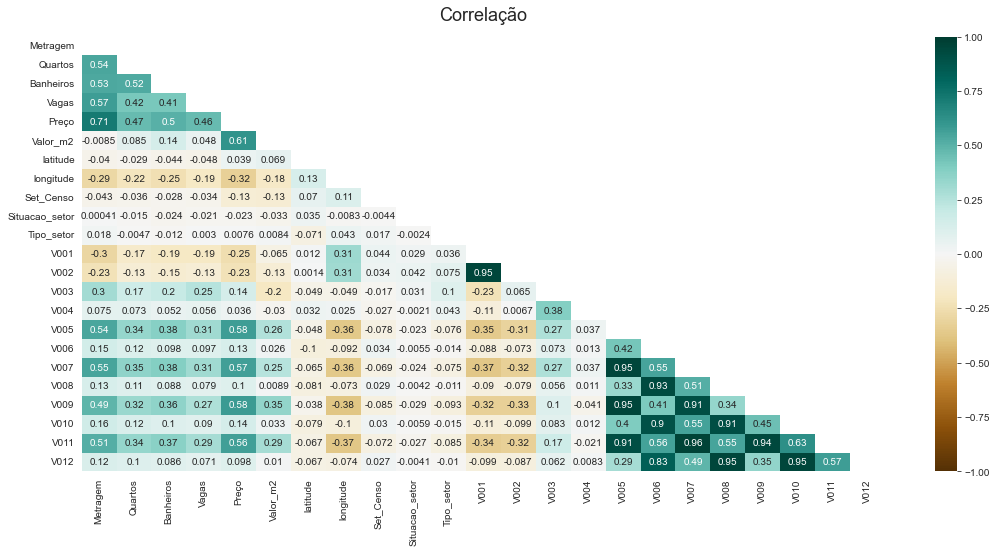

In [56]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

## 04 Modelos de ML aplicados aos dados tratados

### 04.1 Bibliotecas de ML utilizadas

In [57]:
from sklearn.model_selection import train_test_split # Para fazer o split dos dados em dados de treino e validação;
from sklearn.model_selection import cross_val_score # Permite separar o dataset em diferentes grupos de treino e validação;
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #Bibliotecas para observar a precisão dos modelos;

#Como queremos prever o preço da casa, iremos utilizar modelos de IA de regressão. Devido ao fato de nós já termos uma resposta
#para o treinamento, nosso modelo será de aprendizado supervisionado.
from sklearn.linear_model import LinearRegression # Modelo de IA 
from sklearn.ensemble import RandomForestRegressor # Modelo de IA
from xgboost import XGBRegressor # Modelo de IA

In [58]:
class Predição():
    
    def pred(self, lista_valores):
        return self.modelo_treinado.predict(lista_valores)
    
    def metricas(self, lista_valores,coluna):
        met_pred = self.pred(self.xv)
        met_MAE = round(mean_absolute_error(self.yv,met_pred),2)
        met_MSE = round(np.sqrt(mean_squared_error(self.yv, met_pred)),2)
        met_RDS = round(r2_score(self.yv, met_pred),2)
        return pd.DataFrame(self.PARAMv+[met_MAE, met_MSE, met_RDS],
                            self.PARAMt+["MAE", "MSE", "R²"], columns=[coluna])

#### 04.2 Modelo de Regressão Linear

##### Modelo de base (Utilizando apenas os dados originais do dataset)

In [59]:
#Crio uma classe que me permitirá treinar e testar o modelo de regressão linear de forma que a quantidade de linhas necessárias
#seja a mínima possível.
class regr_lin(Predição):
    
    def __init__(self,data,X,Y,PARAM,RST=0):
        x_rl = data[X]
        y_rl = data[Y]
        self.RST = RST            
        self.PARAMv = [self.RST]
        self.PARAMt = [PARAM]
        self.xt, self.xv, self.yt, self.yv = train_test_split(x_rl, y_rl, test_size=0.25, random_state=self.RST)
        self.modelo = LinearRegression()
        self.modelo_treinado = self.modelo.fit(self.xt,self.yt)

In [60]:
modeloUm_BL = regr_lin(data=dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas"], Y="Preço", 
                       RST=0, PARAM="Random_state")
resultado_modeloUm_BL = modeloUm_BL.metricas(lista_valores = modeloUm_BL.xv,coluna = "Modelo %s"%(0))

for i in range(1,11):
    j = i*10
    modeloUm_BL = regr_lin(data=dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas"], Y="Preço", 
                           RST=j, PARAM="Random_state")
    resultado_modeloUm_BL = pd.concat([resultado_modeloUm_BL, modeloUm_BL.metricas(modeloUm_BL.xv, 
                                                                                   coluna="Modelo %s"%(i))], axis=1)
resultado_modeloUm_BL

,Modelo 0,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5,Modelo 6,Modelo 7,Modelo 8,Modelo 9,Modelo 10
Random_state,0.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,100.00
MAE,757621.26,745584.74,733845.97,716685.07,736321.39,718283.81,722285.90,728514.98,735155.46,741076.01,715385.15
MSE,1094499.95,1083264.62,1037525.33,1002644.81,1056299.19,1016382.29,1024495.04,1051312.15,1057901.84,1029684.71,1019511.76
R²,0.47,0.49,0.49,0.55,0.51,0.56,0.52,0.52,0.56,0.54,0.55


Entre os modelos de base utilizando o dataset original podemos observar que os modelos que apresentam random_states = [30,50,80,100] apresentam um maior valor R², sendo portanto os melhores modelo, utilizando apenas essa métrica.

Agora, se olharmos para os resultados de random_states = [30,50,60,100], vemos que eles apresentam os menores resultados para o MAE

Já, se olharmos para a métrica do MSE, os modelos que apresentam random_state = [30,50,90,100]. 

Assim, num possível deploy desse modelo o modelo com random_states = [30,50] seriam os dois "finalistas" para uma análise utilizando novos dados da vida real.

##### Modelo Complexo (Incluindo o uso de dados do IBGE)

Dos dados do IBGE irei utilizar o V005, que representa o rendimento mensal médio dos responsáveis, como temos esse valor para cada casa no bairro podemos pensar nele como sendo um "rendimento mensal médio do bairro".

In [61]:
modeloUm_CP = regr_lin(data=dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
                       RST=0, PARAM="Random_state")
resultado_modeloUm_CP = modeloUm_CP.metricas(lista_valores = modeloUm_CP.xv,coluna = "Modelo %s"%(0))

for i in range(1,11):
    j = i*10
    modeloUm_CP = regr_lin(data=dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
                           RST=j, PARAM="Random_state")
    resultado_modeloUm_CP = pd.concat([resultado_modeloUm_CP,modeloUm_CP.metricas(
        lista_valores = modeloUm_CP.xv,coluna = "Modelo %s"%(i))], axis=1)
resultado_modeloUm_CP

,Modelo 0,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5,Modelo 6,Modelo 7,Modelo 8,Modelo 9,Modelo 10
Random_state,0.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,100.00
MAE,697954.67,681824.52,681338.03,663552.40,668781.47,665782.74,653647.36,667446.23,685092.73,676686.65,660547.75
MSE,1039384.38,1031237.80,1012143.34,955558.41,991379.14,962270.48,959436.06,1004961.38,1029089.36,966090.03,984007.31
R²,0.52,0.53,0.52,0.59,0.57,0.61,0.58,0.57,0.59,0.59,0.58


Fazendo uma análise semelhante a feita anteriormente, os modelos "finalistas" seriam aqueles que apresentam um Random_states = [30,50]. Contudo, embora tenha ocorrido uma melhoria no modelo, quando comparada a sua versão baseline, essa melhoria não é tão grande do ponto de vista do R² e do MAE.

#### 04.3 Modelo de Floresta Aleatória

##### Modelo de base

In [62]:
class Flor_alea(Predição):
    
    def __init__(self,data,X,Y,RST,NEST,PARAM):
        xfla = data[X]
        yfla = data[Y]
        self.RST = RST
        self.NEST = NEST
        self.PARAMt = PARAM
        self.PARAMv = [self.RST, self.NEST]
        self.xt, self.xv, self.yt, self.yv = train_test_split(xfla, yfla, test_size=0.25, random_state=self.RST)
        self.modelo = RandomForestRegressor(random_state=RST, n_estimators = self.NEST)
        self.modelo_treinado = self.modelo.fit(self.xt, self.yt)

In [63]:
modeloDo_BL = Flor_alea(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas"], Y="Preço", 
                        RST=0, NEST=50, PARAM=["Random_state","N_estimators"])
resultado_modeloDo_BL = modeloDo_BL.metricas(modeloDo_BL.xv, "Modelo (%s,%s)"%(0,50))
resultado_modeloDo_BL.drop("Modelo (0,50)", axis=1, inplace=True)
for i in range(50,251,50):
    for j in range(0,11):
        modeloDo_BL = Flor_alea(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas"], Y="Preço", 
                                RST=j, NEST=i, PARAM=["Random_state","N_estimators"])
        resultado_modeloDo_BL = pd.concat([resultado_modeloDo_BL, 
                                            modeloDo_BL.metricas(modeloDo_BL.xv, "Modelo (%s,%s)"%(j,i))], axis=1)
resultado_modeloDo_BL

,"Modelo (0,50)","Modelo (1,50)","Modelo (2,50)","Modelo (3,50)","Modelo (4,50)","Modelo (5,50)","Modelo (6,50)","Modelo (7,50)","Modelo (8,50)","Modelo (9,50)",...,"Modelo (1,250)","Modelo (2,250)","Modelo (3,250)","Modelo (4,250)","Modelo (5,250)","Modelo (6,250)","Modelo (7,250)","Modelo (8,250)","Modelo (9,250)","Modelo (10,250)"
Random_state,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
N_estimators,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
MAE,770185.19,749168.73,745520.81,749681.85,739645.27,786949.26,760992.88,741463.98,695452.60,738262.64,...,744723.42,741077.86,745141.38,731869.97,782787.59,760049.18,733724.31,696074.25,740657.02,773923.98
MSE,1106429.21,1078894.28,1086507.98,1076647.41,1050161.18,1120349.04,1099691.31,1068585.98,1017071.14,1071293.51,...,1072890.18,1076025.02,1075889.36,1037785.17,1111842.33,1099411.86,1057982.01,1016745.05,1072400.81,1113015.22
R²,0.46,0.50,0.50,0.53,0.52,0.47,0.53,0.54,0.56,0.50,...,0.51,0.51,0.53,0.53,0.48,0.53,0.55,0.56,0.50,0.46


In [64]:
resultado_modeloDo_BL.T.describe()

,Random_state,N_estimators,MAE,MSE,R²
count,55.000000,55.000000,55.000000,5.500000e+01,55.000000
mean,5.000000,150.000000,748117.048364,1.077643e+06,0.509091
std,3.191424,71.362403,22906.938755,2.876181e+04,0.031286
min,0.000000,50.000000,695452.600000,1.016745e+06,0.450000
25%,2.000000,100.000000,738953.955000,1.065536e+06,0.480000
50%,5.000000,150.000000,745330.260000,1.076451e+06,0.510000
75%,8.000000,200.000000,764595.720000,1.100032e+06,0.530000
max,10.000000,250.000000,786949.260000,1.120349e+06,0.560000


In [65]:
resultado_modeloDo_BL.T[(resultado_modeloDo_BL.T["R²"] > 0.54) |
                       (resultado_modeloDo_BL.T["MAE"] < resultado_modeloDo_BL.T["MAE"].quantile(0.1)) |
                       (resultado_modeloDo_BL.T["MSE"] < resultado_modeloDo_BL.T["MSE"].quantile(0.1))]

,Random_state,N_estimators,MAE,MSE,R²
"Modelo (8,50)",8.0,50.0,695452.60,1017071.14,0.56
"Modelo (7,100)",7.0,100.0,737404.16,1062486.79,0.55
"Modelo (8,100)",8.0,100.0,696710.22,1017688.68,0.56
"Modelo (7,150)",7.0,150.0,734286.26,1061288.02,0.55
"Modelo (8,150)",8.0,150.0,696660.83,1018986.49,0.55
"Modelo (7,200)",7.0,200.0,733307.04,1058337.28,0.55
"Modelo (8,200)",8.0,200.0,696686.13,1018722.45,0.55
"Modelo (4,250)",4.0,250.0,731869.97,1037785.17,0.53
"Modelo (7,250)",7.0,250.0,733724.31,1057982.01,0.55
"Modelo (8,250)",8.0,250.0,696074.25,1016745.05,0.56


Dentre todos os modelos propostos, os modelos [(8,50),(8,250)] aparentam ter os melhores resultados para o conjunto de métricas. Sendo portanto nossos modelos "finalistas" para um possível deploy. 

##### Modelo Complexo

In [66]:
modeloDo_CP = Flor_alea(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
                        RST=0, NEST=50, PARAM=["Random_state","N_estimators"])
resultado_modeloDo_CP = modeloDo_CP.metricas(modeloDo_CP.xv, "Modelo (%s,%s)"%(0,50))
resultado_modeloDo_CP.drop("Modelo (0,50)", axis=1, inplace=True)
for i in range(50,251,50):
    for j in range(0,11):
        modeloDo_CP = Flor_alea(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
                                RST=j, NEST=i, PARAM=["Random_state","N_estimators"])
        resultado_modeloDo_CP = pd.concat([resultado_modeloDo_CP, 
                                           modeloDo_CP.metricas(modeloDo_CP.xv, "Modelo (%s,%s)"%(j,i))], axis=1)
resultado_modeloDo_CP

,"Modelo (0,50)","Modelo (1,50)","Modelo (2,50)","Modelo (3,50)","Modelo (4,50)","Modelo (5,50)","Modelo (6,50)","Modelo (7,50)","Modelo (8,50)","Modelo (9,50)",...,"Modelo (1,250)","Modelo (2,250)","Modelo (3,250)","Modelo (4,250)","Modelo (5,250)","Modelo (6,250)","Modelo (7,250)","Modelo (8,250)","Modelo (9,250)","Modelo (10,250)"
Random_state,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
N_estimators,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
MAE,520098.59,505161.11,506820.31,513268.98,503711.78,517603.06,498700.44,496287.27,498583.47,517829.41,...,497887.81,506245.61,512741.78,496968.06,515842.42,499126.45,487422.77,496366.63,513237.62,523161.40
MSE,793650.80,800139.57,801313.51,798227.10,773467.56,781516.77,780588.74,783986.12,794196.15,817038.54,...,788727.67,793543.48,798422.50,757787.10,776867.39,782482.54,766703.49,787767.38,806696.55,791284.00
R²,0.72,0.72,0.73,0.74,0.74,0.74,0.77,0.75,0.73,0.71,...,0.73,0.73,0.74,0.75,0.75,0.76,0.76,0.73,0.72,0.73


In [67]:
resultado_modeloDo_CP.T.describe()

,Random_state,N_estimators,MAE,MSE,R²
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,5.000000,150.000000,507384.594364,788492.954727,0.736545
std,3.191424,71.362403,10279.756627,13085.186615,0.015542
min,0.000000,50.000000,487422.770000,757787.100000,0.710000
25%,2.000000,100.000000,498631.170000,780792.735000,0.730000
50%,5.000000,150.000000,506987.880000,790846.730000,0.730000
75%,8.000000,200.000000,515886.875000,797033.155000,0.750000
max,10.000000,250.000000,524340.630000,817038.540000,0.770000


In [68]:
resultado_modeloDo_CP.T[(resultado_modeloDo_CP.T["R²"] > 0.76) |
                        (resultado_modeloDo_CP.T["MAE"] < resultado_modeloDo_CP.T["MAE"].quantile(0.1))|
                        (resultado_modeloDo_CP.T["MSE"] < resultado_modeloDo_CP.T["MSE"].quantile(0.1))]

,Random_state,N_estimators,MAE,MSE,R²
"Modelo (6,50)",6.0,50.0,498700.44,780588.74,0.77
"Modelo (7,50)",7.0,50.0,496287.27,783986.12,0.75
"Modelo (4,100)",4.0,100.0,499584.24,766995.79,0.74
"Modelo (7,100)",7.0,100.0,494930.59,779180.73,0.76
"Modelo (8,100)",8.0,100.0,495343.80,788493.32,0.73
"Modelo (4,150)",4.0,150.0,497912.22,759995.83,0.75
"Modelo (6,150)",6.0,150.0,498990.92,780996.73,0.77
"Modelo (7,150)",7.0,150.0,490190.89,773231.46,0.76
"Modelo (4,200)",4.0,200.0,499066.98,760997.57,0.75
"Modelo (7,200)",7.0,200.0,489237.86,769976.18,0.76


Podemos notar uma grande avanço nos valores de R² e do MAE quando comparamos esse modelo com a versão baseline, indicando que o uso da base de dados de renda do IBGE melhorou, e muito o modelo. Aqui, nossos modelos "finalistas" são os modelos = [(7,250),(7,200)]

#### 04.4 Extreme gradient boosting

##### Modelo Baseline

Aqui seria uma boa ideia seria colocar uma taxa de aprendizado (learning rate) nos parâmetros do modelo, porém visando uma facilidade em nossa análise irei utilizar como parâmetros apenas o N_estimators e o random_state.

In [69]:
class xgbst(Predição):
    
    def __init__(self,data,X,Y,RST,NEST,PARAM):
        xfla = data[X]
        yfla = data[Y]
        self.RST = RST
        self.NEST = NEST
        self.PARAMt = PARAM
        self.PARAMv = [self.RST, self.NEST]
        self.xt, self.xv, self.yt, self.yv = train_test_split(xfla, yfla, test_size=0.25, random_state=self.RST)
        self.modelo = XGBRegressor(random_state=RST, n_estimators = self.NEST)
        self.modelo_treinado = self.modelo.fit(self.xt, self.yt)

In [70]:
modeloTr_BL = xgbst(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas"], Y="Preço", 
                        RST=0, NEST=50, PARAM=["Random_state","N_estimators"])
resultado_modeloTr_BL = modeloTr_BL.metricas(modeloTr_BL.xv, "Modelo (%s,%s)"%(0,50))
resultado_modeloTr_BL.drop("Modelo (0,50)", axis=1, inplace=True)
for i in range(50,251,50):
    for j in range(0,11):
        modeloTr_BL = xgbst(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas"], Y="Preço", 
                                RST=j, NEST=i, PARAM=["Random_state","N_estimators"])
        resultado_modeloTr_BL = pd.concat([resultado_modeloTr_BL, 
                                            modeloTr_BL.metricas(modeloTr_BL.xv, "Modelo (%s,%s)"%(j,i))], axis=1)
resultado_modeloTr_BL

,"Modelo (0,50)","Modelo (1,50)","Modelo (2,50)","Modelo (3,50)","Modelo (4,50)","Modelo (5,50)","Modelo (6,50)","Modelo (7,50)","Modelo (8,50)","Modelo (9,50)",...,"Modelo (1,250)","Modelo (2,250)","Modelo (3,250)","Modelo (4,250)","Modelo (5,250)","Modelo (6,250)","Modelo (7,250)","Modelo (8,250)","Modelo (9,250)","Modelo (10,250)"
Random_state,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
N_estimators,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
MAE,726292.84,725880.78,725082.88,721441.51,700930.19,750656.62,716641.66,721075.71,682955.21,710096.89,...,779264.94,766597.45,761335.11,754022.21,798704.13,792646.97,763556.53,718195.26,767108.22,814026.35
MSE,1066992.46,1069376.70,1057296.96,1058849.67,1003229.19,1075116.26,1045835.25,1046649.62,1000086.01,1047156.65,...,1171971.05,1125929.33,1134401.50,1093060.92,1154907.61,1157442.72,1120136.05,1062766.25,1126029.32,1202454.98
R²,0.50,0.51,0.53,0.54,0.56,0.51,0.58,0.56,0.57,0.52,...,0.41,0.46,0.47,0.47,0.44,0.48,0.50,0.52,0.45,0.37


In [71]:
resultado_modeloTr_BL.T.describe()

,Random_state,N_estimators,MAE,MSE,R²
count,55.000000,55.000000,55.000000,5.500000e+01,55.000000
mean,5.000000,150.000000,747031.026545,1.096396e+06,0.490364
std,3.191424,71.362403,28336.453337,4.434594e+04,0.045743
min,0.000000,50.000000,682955.210000,1.000086e+06,0.370000
25%,2.000000,100.000000,726185.960000,1.068185e+06,0.460000
50%,5.000000,150.000000,747650.710000,1.094882e+06,0.500000
75%,8.000000,200.000000,765076.990000,1.125979e+06,0.520000
max,10.000000,250.000000,814026.350000,1.202455e+06,0.580000


In [72]:
resultado_modeloTr_BL.T[(resultado_modeloTr_BL.T["R²"] > 0.54) |
                        (resultado_modeloTr_BL.T["MAE"] < resultado_modeloTr_BL.T["MAE"].quantile(0.1))|
                        (resultado_modeloTr_BL.T["MSE"] < resultado_modeloTr_BL.T["MSE"].quantile(0.1))]

,Random_state,N_estimators,MAE,MSE,R²
"Modelo (4,50)",4.0,50.0,700930.19,1003229.19,0.56
"Modelo (6,50)",6.0,50.0,716641.66,1045835.25,0.58
"Modelo (7,50)",7.0,50.0,721075.71,1046649.62,0.56
"Modelo (8,50)",8.0,50.0,682955.21,1000086.01,0.57
"Modelo (9,50)",9.0,50.0,710096.89,1047156.65,0.52
"Modelo (4,100)",4.0,100.0,713818.55,1028524.32,0.53
"Modelo (6,100)",6.0,100.0,736004.60,1079144.58,0.55
"Modelo (8,100)",8.0,100.0,692081.46,1020045.32,0.55
"Modelo (8,150)",8.0,150.0,701149.24,1036539.11,0.54
"Modelo (8,200)",8.0,200.0,710948.23,1052937.84,0.52


Dentre os valores desse modelo baseline, os melhores valores são os dos modelos = [(8,50),(8,100)]

##### Modelo Complexo

In [73]:
modeloTr_CP = xgbst(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
                        RST=0, NEST=50, PARAM=["Random_state","N_estimators"])
resultado_modeloTr_CP = modeloTr_CP.metricas(modeloTr_CP.xv, "Modelo (%s,%s)"%(0,50))
resultado_modeloTr_CP.drop("Modelo (0,50)", axis=1, inplace=True)
for i in range(50,251,50):
    for j in range(0,11):
        modeloTr_CP = xgbst(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
                                RST=j, NEST=i, PARAM=["Random_state","N_estimators"])
        resultado_modeloTr_CP = pd.concat([resultado_modeloTr_CP, 
                                            modeloTr_CP.metricas(modeloTr_CP.xv, "Modelo (%s,%s)"%(j,i))], axis=1)
resultado_modeloTr_CP

,"Modelo (0,50)","Modelo (1,50)","Modelo (2,50)","Modelo (3,50)","Modelo (4,50)","Modelo (5,50)","Modelo (6,50)","Modelo (7,50)","Modelo (8,50)","Modelo (9,50)",...,"Modelo (1,250)","Modelo (2,250)","Modelo (3,250)","Modelo (4,250)","Modelo (5,250)","Modelo (6,250)","Modelo (7,250)","Modelo (8,250)","Modelo (9,250)","Modelo (10,250)"
Random_state,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
N_estimators,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
MAE,532355.81,519538.23,520880.67,518257.86,503367.95,520730.78,508913.08,514215.49,520028.88,539648.91,...,456936.00,463058.48,466705.30,448915.97,462483.97,455243.83,462035.85,473382.30,475365.92,481453.86
MSE,784298.96,795819.35,802599.63,788861.21,764895.48,777940.07,769434.76,798702.52,803871.17,816656.06,...,742942.19,756936.98,764514.20,718022.86,730476.31,745189.65,763881.49,775113.79,771667.55,764484.02
R²,0.73,0.73,0.73,0.75,0.74,0.74,0.77,0.74,0.72,0.71,...,0.76,0.76,0.76,0.77,0.77,0.79,0.77,0.74,0.74,0.74


In [74]:
resultado_modeloTr_CP.T.describe()

,Random_state,N_estimators,MAE,MSE,R²
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,5.000000,150.000000,485118.712909,763513.519818,0.752909
std,3.191424,71.362403,22582.451153,22085.914302,0.017285
min,0.000000,50.000000,448915.970000,718022.860000,0.710000
25%,2.000000,100.000000,466779.475000,746468.960000,0.740000
50%,5.000000,150.000000,481410.180000,764895.480000,0.760000
75%,8.000000,200.000000,497545.255000,775203.870000,0.765000
max,10.000000,250.000000,539648.910000,816656.060000,0.790000


In [75]:
resultado_modeloTr_CP.T[(resultado_modeloTr_CP.T["R²"] > 0.77) |
                        (resultado_modeloTr_CP.T["MAE"] < resultado_modeloTr_CP.T["MAE"].quantile(0.1))|
                        (resultado_modeloTr_CP.T["MSE"] < resultado_modeloTr_CP.T["MSE"].quantile(0.1))]

,Random_state,N_estimators,MAE,MSE,R²
"Modelo (4,100)",4.0,100.0,472414.65,727488.57,0.77
"Modelo (6,100)",6.0,100.0,487058.16,759903.18,0.78
"Modelo (4,150)",4.0,150.0,460038.64,726137.58,0.77
"Modelo (6,150)",6.0,150.0,470770.98,748980.62,0.78
"Modelo (4,200)",4.0,200.0,453690.18,720730.21,0.77
"Modelo (5,200)",5.0,200.0,466706.34,732190.38,0.77
"Modelo (6,200)",6.0,200.0,458995.25,744652.49,0.79
"Modelo (1,250)",1.0,250.0,456936.00,742942.19,0.76
"Modelo (4,250)",4.0,250.0,448915.97,718022.86,0.77
"Modelo (5,250)",5.0,250.0,462483.97,730476.31,0.77


Aqui novamente temos um grande avanço no modelo quando comparado com sua versão "Baseline". Se formos olhar para os nossos melhores "finalistas" teríamos que os modelos = [(6,250),(4,250)] ganham o pódio.

#### 04.5 Conclusões

Os dois modelos "vencedores" aqui são o modelo de floresta aleatória e o modelo de XGBRegressor. Primeiramente devemos olhar para os resultados obtidos.

In [76]:
resultado_modeloDo_CP.T.loc[["Modelo (7,200)","Modelo (7,250)"]]

,Random_state,N_estimators,MAE,MSE,R²
"Modelo (7,200)",7.0,200.0,489237.86,769976.18,0.76
"Modelo (7,250)",7.0,250.0,487422.77,766703.49,0.76


In [77]:
resultado_modeloTr_CP.T.loc[["Modelo (4,250)","Modelo (6,250)"]]

,Random_state,N_estimators,MAE,MSE,R²
"Modelo (4,250)",4.0,250.0,448915.97,718022.86,0.77
"Modelo (6,250)",6.0,250.0,455243.83,745189.65,0.79


Para uma possível implementação o modelo sugerido seria o modelo XGBoost. Existem outras melhorias possíveis para o modelo, por exemplo poderíamos alterar os valores dos parâmetros (já conhecidos) random_state e N_estimators buscando melhores previsões, também poderíamos observar como o modelo reage a diferente valores para o parâmetro de taxa de aprendizado. Além disso poderíamos também utilizar outras medidas como latitude e longitude da casa, assim teríamos uma ideia melhor do preço daquela região, o desafio aqui seria obter esses dados sempre que quisermos fazer outra previsão.

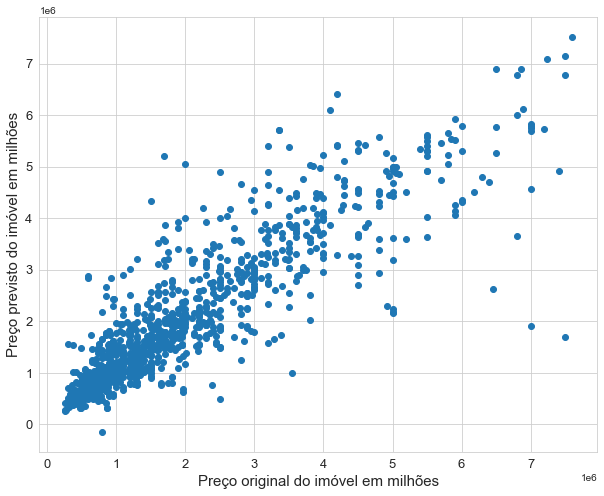

In [79]:
Modelo_final = xgbst(dados_vendas_censo, X=["Metragem","Quartos","Banheiros","Vagas","V005"], Y="Preço", 
               RST=4, NEST=250, PARAM=["Random_state","N_estimators"])
fonte = {"size":15}
plt.figure(figsize=(10,8))
plt.scatter(Modelo_final.yv, Modelo_final.pred(Modelo_final.xv))
plt.xlabel("Preço original do imóvel em milhões", fontdict = fonte)
plt.ylabel("Preço previsto do imóvel em milhões", fontdict = fonte)
plt.tick_params(axis = "both", labelsize=13)
plt.show()

## Referências
<ul>
    <li><a href=https://www.alura.com.br/>Alura</a>: https://www.alura.com.br/</li>
</ul>

### Documentação das bibliotecas utilizadas

- [Pandas](https://pandas.pydata.org/docs/)
<br><br>
- [Sklearn](https://scikit-learn.org/stable/)
<br><br>
- [Geopandas](https://geopandas.org/en/stable/docs.html)
<br><br>

### Outros
<ul>
<li><a href=https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244#:~:textThe%20interquartile%20range%20is%20calculated,is%20spread%20about%20the%20median> [1] </a> Método da distância entre quartis;</li>
</ul>

## Sobre mim

Me chamo **Gabriel João Dalla Nora**, sou formado no curso de bacharelado em física pela UFSM. Durante minha graduação obtive experiência como assistente de pesquisa em Física Nuclear, desenvolvendo habilidades em programação (principalmente em FORTRAN e em Python), matemática e análise de dados, fazendo apresentações acadêmicas para o grupo de estudo. 

Você pode entrar em contato comigo através de meu e-mail: gabrieljoao.dallanora@gmail.com

[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/gabriel-joão-dalla-nora-769a69144/)
[![GitHub](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/GabrielJDN)